In [44]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [45]:
key = "1sKG6aj6JUQi8D22lH"  #my key for API access
material = "mp-570213"   #ID of my material
m = MPRester(key)
struct = m.get_structure_by_material_id(material,conventional_unit_cell=True) #Getting structure object
w = CifWriter(struct)    #Write to CIF
w.write_file(material+".cif") 
print("Click on the link to download my CIF file")
display(FileLink(material+".cif"))

Click on the link to download my CIF file


/home/users/g/m/gmevisse/mp-570213.cif

# Bande interdite

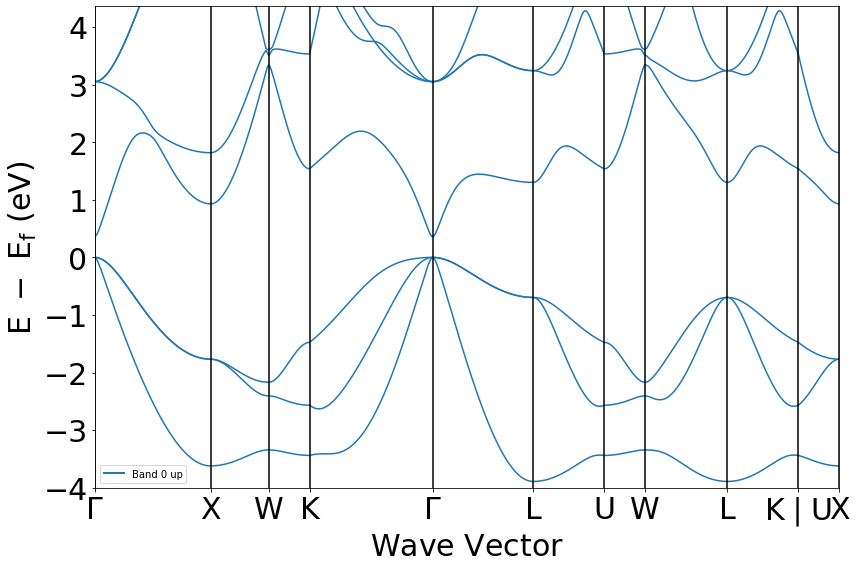

{'direct': True, 'energy': 0.35870000000000024, 'transition': '\\Gamma-\\Gamma'}


In [46]:
band = m.get_bandstructure_by_material_id(material)
bsplotter = BSPlotter(band)
bsplotter.show()
print(band.get_band_gap())


On voit que la bande interdite est directe, et a une énergie de 0.3587 eV. Le matériau est donc semi-conducteur.

La dispersion maximale dans la bande de valence correspond à la pente de  2.2714848583841203 dans la direction W-L
Représenté par la flèche rouge sur le graphe
La dispersion minimale dans la bande de valence correspond à la pente de  0.8734038931701265 dans la direction X-W
Représenté par la flèche bleue sur le graphe
 
La dispersion maximale dans la bande de conduction correspond à la pente de  5.56169999667889 dans les directions W-K et U-W
Représentées par les flèches vertes sur le graphe
La dispersion minimale dans la bande de conduction correspond à la pente de  0.41958323927159746 dans la direction L-K
Représenté par la flèche jaune sur le graphe
 
Structures des bandes électroniques du CSO :


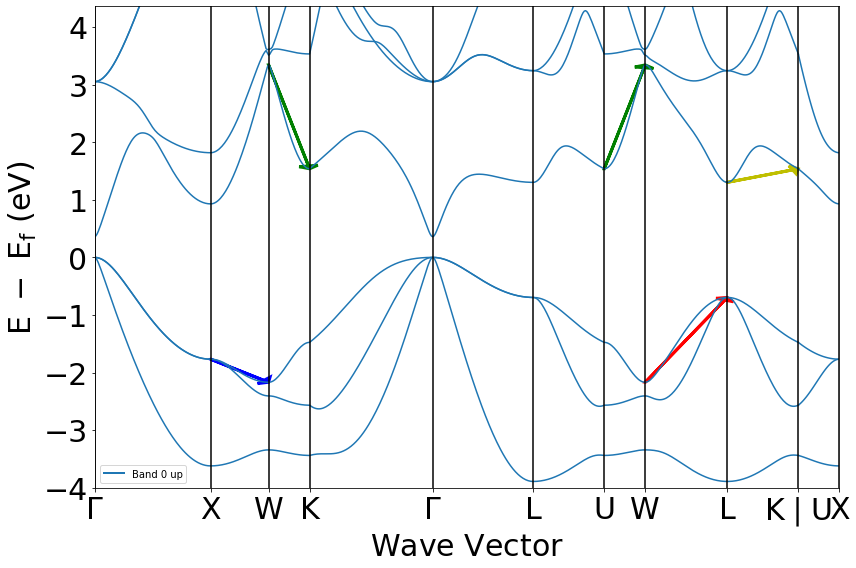

In [68]:
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
E = data.get('energy').get('1')
D = data.get('ticks').get('distance')
#vbm = band.get_vbm()
#print("Index vbm :" , vbm['band_index'])   
#cbm = band.get_cbm()
#print("Index cbm :" ,cbm['band_index'])      Pour avoir les indices des bandes
Vindex = 7
Cindex = 8

slopeV = np.zeros(10)
slopeC = np.zeros(10)
Dbranch = np.unique(D)   #Efface les redondances
for i in range(10):
    DeltaD = Dbranch[i+1]-Dbranch[i]
    slopeV[i] = abs(((E[i][Vindex])[-1] - (E[i][Vindex])[0])/(DeltaD) )
    slopeC[i] = abs(((E[i][Cindex])[-1] - (E[i][Cindex])[0])/(DeltaD) )

maxV = np.max(slopeV) #indice 7
minV = np.min(slopeV) #indice 1
print("La dispersion maximale dans la bande de valence correspond à la pente de ",maxV,"dans la direction W-L")
print("Représenté par la flèche rouge sur le graphe")
print("La dispersion minimale dans la bande de valence correspond à la pente de ",minV,"dans la direction X-W")
print("Représenté par la flèche bleue sur le graphe")
print(" ")
maxC = np.amax(slopeC) #indice 2 et 6
minC = np.amin(slopeC) #indice 8
print("La dispersion maximale dans la bande de conduction correspond à la pente de ",maxC,"dans les directions W-K et U-W")
print("Représentées par les flèches vertes sur le graphe")
print("La dispersion minimale dans la bande de conduction correspond à la pente de ",minC,"dans la direction L-K")
print("Représenté par la flèche jaune sur le graphe")
print(" ")


plt.arrow(Dbranch[7], (E[7][Vindex])[0],Dbranch[8] - Dbranch[7], (E[7][Vindex])[-1] - (E[7][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Dbranch[1], (E[1][Vindex])[0], Dbranch[2] -Dbranch[1], (E[1][Vindex])[-1] - (E[1][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(Dbranch[2], (E[2][Cindex])[0], Dbranch[3] - Dbranch[2], (E[2][Cindex])[-1] - (E[2][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[6], (E[6][Cindex])[0], Dbranch[7] - Dbranch[6], (E[6][Cindex])[-1] - (E[6][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(Dbranch[8], (E[8][Cindex])[0], Dbranch[9] - Dbranch[8], (E[8][Cindex])[-1] - (E[8][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Structures des bandes électroniques du CSO :")
plt.show()

# Masse effective
Pour trouver la masse effective nous partons de la formule de la masse effective. En supposant une dispersion parabolique, on peut approximer la bande autour du point d'interet (maximum/minimum). On obtient alors cette formule :$E = \hbar^2k^2/2m_{eff} + Ak + B$. En utilisant les coordonnées du point maximum et d'un point voisin, on peut trouver les constantes A et B

In [118]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)
#for i in range(10):
    #print(E[i][Vindex][0])
#max V: E = 0 en Gamma (indice 0)
print("Masse effective dans la bande de valence")
dist = data.get('distances')
print("Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de maximum et un point voisin")
print("Point maximal : (",Dbranch[0], ",", E[0][Vindex][0], "), point sur la branche Gamma" )
print("Second point : (",Dbranch[1], ",", E[1][Vindex][0], "), point sur la branche X" )

a = (E[1][Vindex][0]-E[0][Vindex][0])/(Dbranch[1]-Dbranch[0])**2

d2E =  2*a*(A**(2))*eV
print("\n")
print("Dont on peut calculer la dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("On peut calculer la masse effective m* =", hbar**2/d2E, "[kg]")


Masse effective dans la bande de valence
Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de maximum et un point voisin
Point maximal : ( 0.0 , 0.0 ), point sur la branche Gamma
Second point : ( 0.9173304656244943 , -1.7680999999999998 ), point sur la branche X


Dont on peut calculer la dérivée seconde f''(k) = -4.202281927163036 [eV.A^2]  = -6.73279761481909e-39 [J.m^2]
Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
On peut calculer la masse effective m* = -1.651797340338898e-30 [kg]


In [119]:
#for i in range(10):
    #print(E[i][Cindex][0])
#min C: E = 0 en Gamma (indice 0)

print("Masse effective dans la bande de conduction")
dist = data.get('distances')

print("Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de minimum et un point voisin")
print("Point minimal : (",Dbranch[0], ",", E[0][Cindex][0], "), point sur la branche Gamma" )
print("Second point : (",Dbranch[1], ",", E[0][Cindex][0], "), point sur la branche X" )

a = (E[1][Cindex][0] - E[0][Cindex][0])/(Dbranch[1]-Dbranch[0])**2

d2E =  2*a*(A**(2))*eV

print("\n")
print("Dont on peut calculer la dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("On peut calculer la masse effective m* =", hbar**2/d2E, "[kg]")

Masse effective dans la bande de conduction
Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de minimum et un point voisin
Point minimal : ( 0.0 , 0.35870000000000024 ), point sur la branche Gamma
Second point : ( 0.9173304656244943 , 0.35870000000000024 ), point sur la branche X


Dont on peut calculer la dérivée seconde f''(k) = 1.3559198232263519 [eV.A^2]  = 2.172422962080364e-39 [J.m^2]
Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
On peut calculer la masse effective m* = 5.119268847420166e-30 [kg]
